# THE SPARKS FOUNDATION

## Graduate Rotational Internship Program
### Data Science And Business Analytics Tasks
### Author: Saravanavel v
#### TASK 3 - Exploratory Data Analysis - Retail

#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.



Dataset can be found at https://bit.ly/3i4rbWI

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

### Exploratory Data Analysis
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Import the required libraries

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
dataset= pd.read_csv( 'C:\GRIP\samplesuperstore.csv')

In [3]:
#viewing the data
dataset.head(-5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.5000,10,0.00,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.6000,4,0.00,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.2400,1,0.00,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.9900,1,0.00,28.7964


In [4]:
#Check no of rows and columns in the dataset
dataset.shape

(9994, 13)

In [ ]:
# To check the info about data set
dataset.info()

In [5]:
# To check for NaN or Null values
dataset.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# To check Mean, Median, Standard Deviation, Min., Max. about the columns in data set
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Removing Duplicates
Sometimes you get a messy dataset. You may have to deal with duplicates, which will skew your analysis. In python, pandas offer function drop_duplicates(), which drops the repeated or duplicate records.

In [7]:
dataset.duplicated().sum()

17

In [8]:
# Dropping Postal Code column
dataset = dataset.drop(['Postal Code'],axis = 1)

In [9]:
# To know about the total sales and the profit generated by the retail store.

print('Sales:',dataset['Sales'].sum())
print('Profit:',dataset['Profit'].sum())

Sales: 2297200.8603000003
Profit: 286397.0217


## UNDERSTANDING THE DATASET

#### What are the different ship mode ?

In [10]:
diff_ship_mode=dataset['Ship Mode'].unique()
for x in diff_ship_mode:
    print(x)

Second Class
Standard Class
First Class
Same Day


#### What are the different segments ?

In [11]:
diff_segment=dataset['Segment'].unique()
for x in diff_segment:
    print(x)

Consumer
Corporate
Home Office


#### What are the different Region ?

In [12]:
diff_Region=dataset['Region'].unique()
for x in diff_Region:
    print(x)

South
West
Central
East


#### What are the different category ?

In [13]:
diff_category=dataset['Category'].unique()
for x in diff_category:
    print(x)

Furniture
Office Supplies
Technology


#### What are the different sub-category ?

In [14]:
diff_sub_category=dataset['Sub-Category'].unique()
for x in diff_sub_category:
    print(x)

Bookcases
Chairs
Labels
Tables
Storage
Furnishings
Art
Phones
Binders
Appliances
Paper
Accessories
Envelopes
Fasteners
Supplies
Machines
Copiers



#### What are the Region wise Sales value ?

In [15]:
dataset.groupby("Region").Sales.sum()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

#### What is the maximum sale ?

In [16]:
dataset.Sales.max()

22638.48

#### What is the minimum sale ?

In [17]:
dataset.Sales.min()

0.444

#### What are the Region wise profit value ?

In [18]:
dataset.groupby("Region").Profit.sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

#### What are the Top 10 selling products ?

In [19]:
dataset.groupby("Sub-Category").Sales.sum().sort_values(ascending=False).head()

Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

#### What are the Top 5 Profitable Products ?

In [20]:
dataset.groupby("Sub-Category").Profit.sum().sort_values(ascending=False).head(5)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

#### What are the category wise profit?

In [21]:
dataset.groupby("Category").Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

#### what is the total profit?


In [22]:
dataset['Profit'].sum()

286397.0217

<AxesSubplot:>

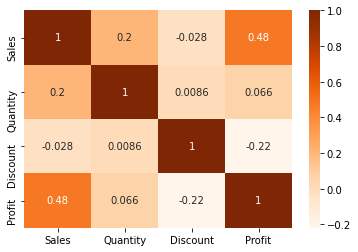

In [23]:
#ploting heat map
corr=dataset.corr()
sns.heatmap(corr,annot=True,cmap='Oranges')

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

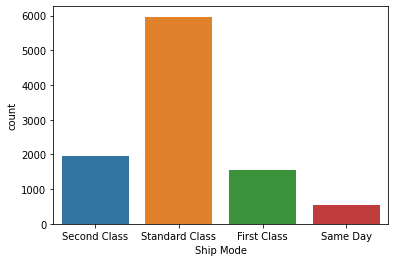

In [24]:
# Value count for Ship Mode
sns.countplot(x=dataset['Ship Mode'])
dataset['Ship Mode'].value_counts()


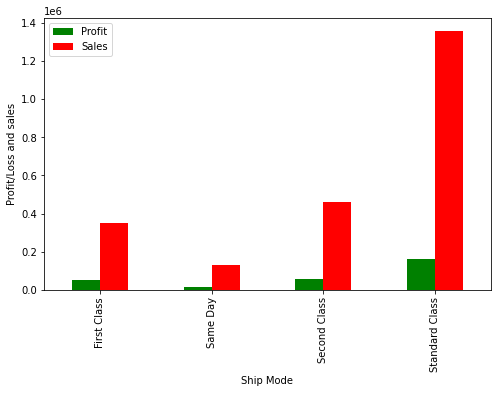

In [25]:
#sales and profit in ship mode
dataset.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

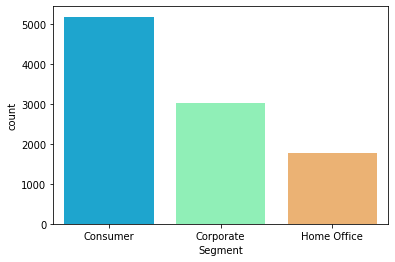

In [26]:
# Value count for segment
sns.countplot(x = 'Segment',data = dataset, palette = 'rainbow')
dataset['Segment'].value_counts()

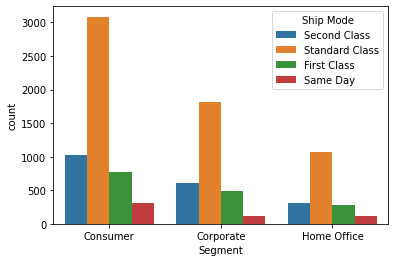

In [27]:
# ship mode of transactions in each segment

sns.countplot(x='Segment', hue='Ship Mode', data=dataset)
plt.show()

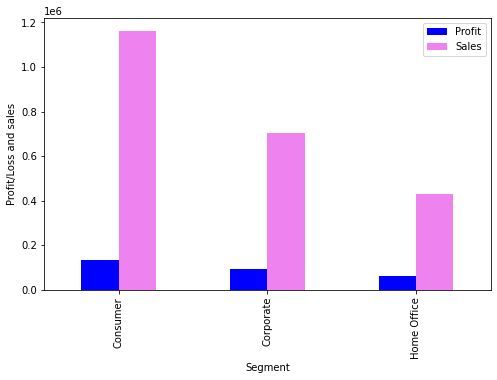

In [28]:
# Groupby Segment & Profit/Loss Vs Sales
dataset.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['blue','violet'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

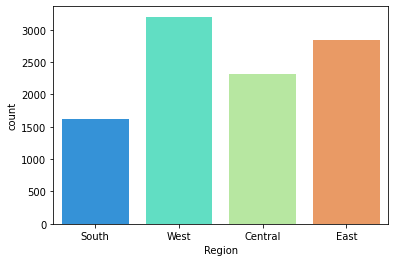

In [29]:

# Value count for region
sns.countplot(x = 'Region',data = dataset, palette = 'rainbow')
dataset['Region'].value_counts()


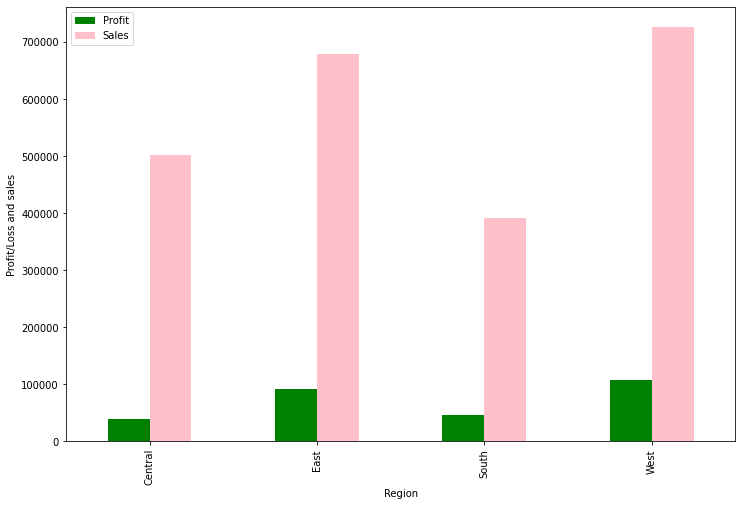

In [30]:
#sales and profit in each region:

# Groupby Region & Profit/loss Vs Sales
dataset.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','pink'],figsize=(12,8))
plt.ylabel('Profit/Loss and sales')
plt.show()

From above graphical representation , we can see that west region made the highest sales and profit, whereas south region has least sales and profit.

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

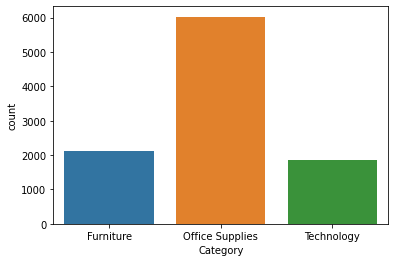

In [31]:
# Value count for Category
sns.countplot(x='Category',data=dataset,palette='tab10')
dataset['Category'].value_counts()

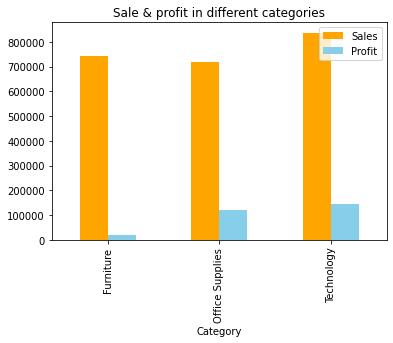

In [32]:
#Product Analysis
dataset.groupby('Category')['Sales','Profit'].sum().plot.bar(color=['orange','skyblue'])
plt.title('Sale & profit in different categories')
plt.legend(loc=1)
plt.show()

In [33]:
# Value Count in subcategories
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

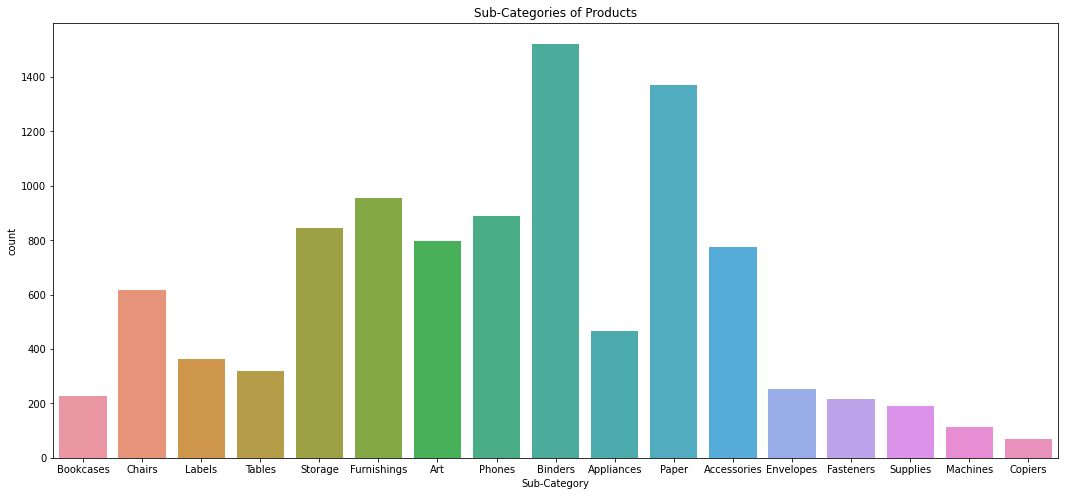

In [34]:
#plot of sub category products

plt.figure(figsize=(18,8))
sns.countplot(x=dataset['Sub-Category'])
plt.title("Sub-Categories of Products")
plt.show()

In [35]:
#mean of State-wise dealings 
state = dataset['State'].value_counts()
state.mean()

203.9591836734694

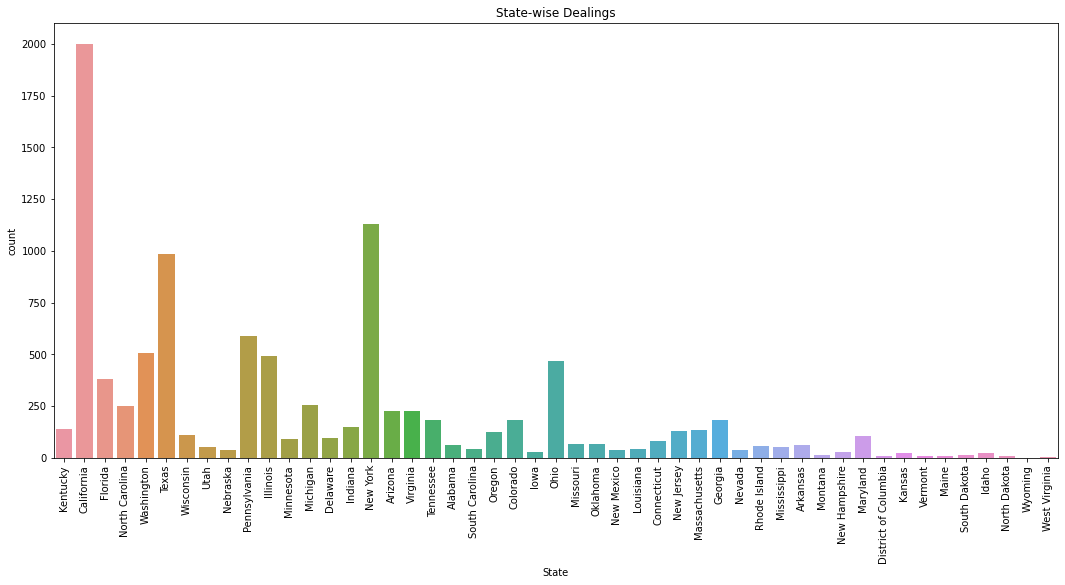

In [36]:
plt.figure(figsize=(18,8))
sns.countplot(x=dataset['State'])
plt.title("State-wise Dealings")
plt.xticks(rotation=90)
plt.show()

### ploting sales from every segment

In [37]:
df = dataset.groupby(['Segment'])[['Quantity','Sales','Profit','Discount']].mean()
df

,Quantity,Sales,Profit,Discount
Segment,,,,
Consumer,3.760547,223.733644,25.836873,0.158141
Corporate,3.843709,233.823300,30.456667,0.158228
Home Office,3.782389,240.972041,33.818664,0.147128


In [38]:
df = dataset.groupby(['State'])[['Profit']].mean()
df.head()

,Profit
State,
Alabama,94.865989
Arizona,-15.303235
Arkansas,66.811452
California,38.171608
Colorado,-35.867351


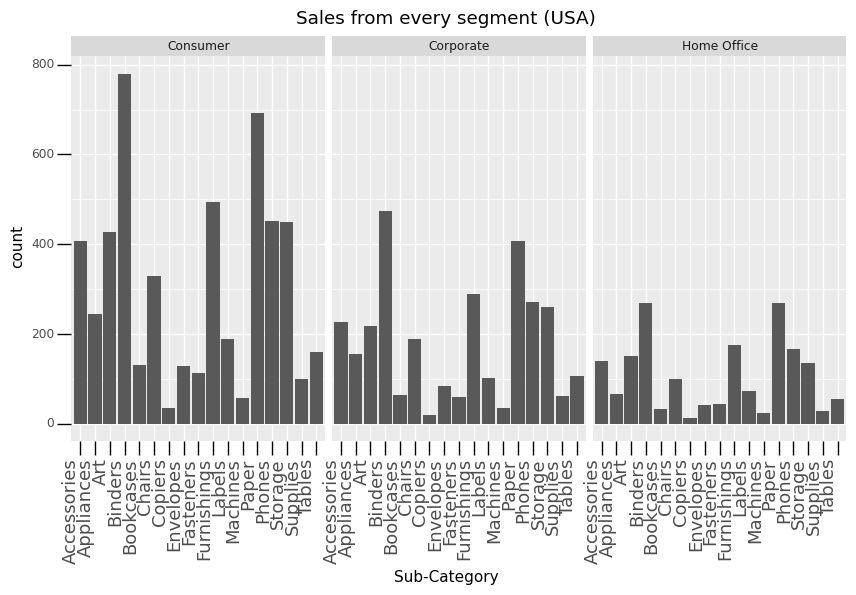

<ggplot: (169071420154)>

In [39]:
flip_xlabels=theme(axis_text_x = element_text(angle=90, hjust=1), figure_size=(10,5),
                   axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(dataset, aes(x='Sub-Category',fill='Sales'))+ geom_bar()+facet_wrap(['Segment'])+flip_xlabels+theme(axis_text_x=element_text(size=13))+ggtitle("Sales from every segment (USA)"))

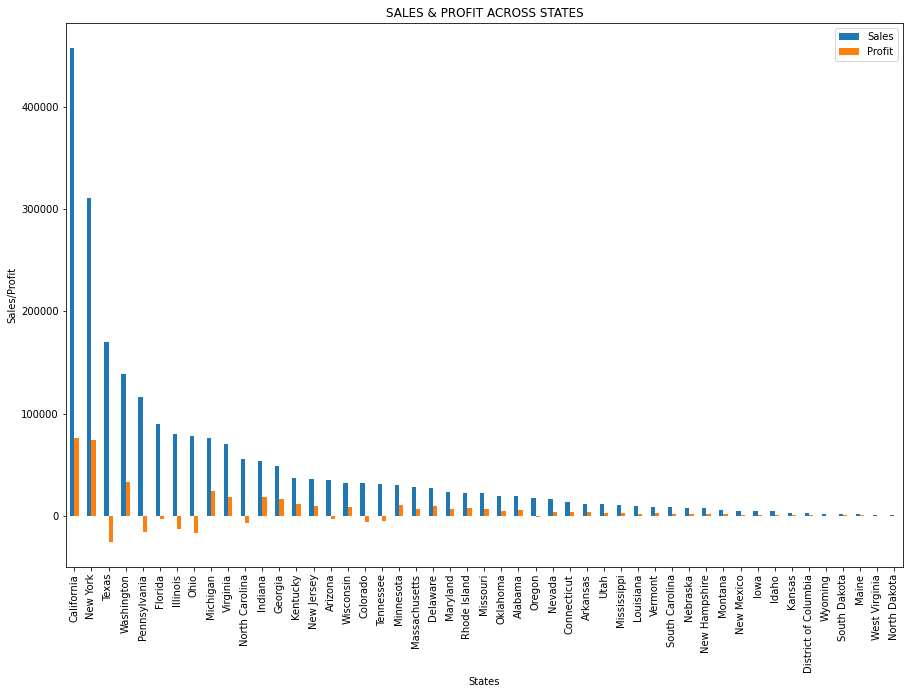

In [40]:
#sales vs profit across states
ps = dataset.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,10))
plt.title('SALES & PROFIT ACROSS STATES')
plt.xlabel('States')
plt.ylabel('Sales/Profit')
plt.show()


From the above observations in the graph we notice that California in west has maximum number of orders and then comes new york east has maximum number of orders  while Lowest Profit is at Texas and Ohio States

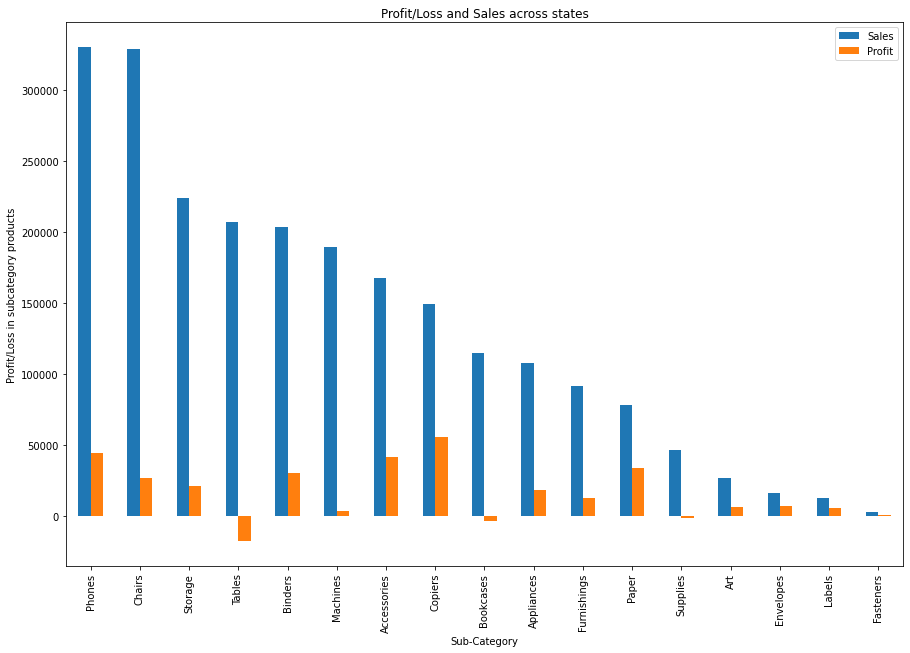

In [41]:
#sales and profit in sub category products
ps = dataset.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,10))
plt.title('Profit/Loss and Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss in subcategory products')
plt.show()


Phones,Chairs,Storage has highest Sales & Tables,Bookcases,Supllies has least Profit


From the above graph we notice that Phones have highest sales then comes chairs

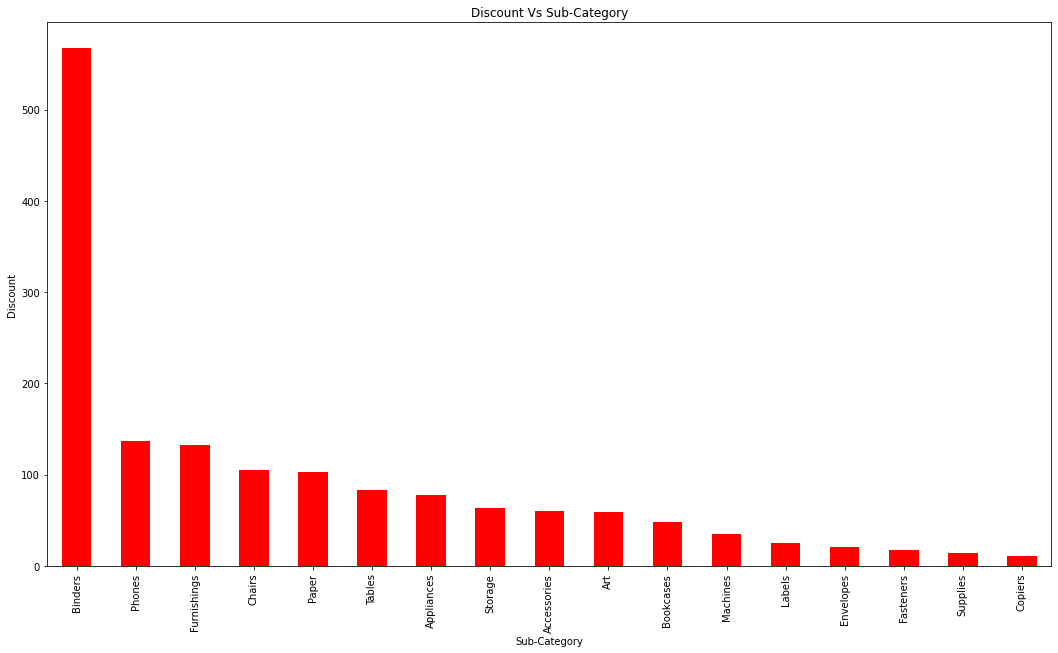

In [42]:
# Groupby Sub-Category & Discount
ps = dataset.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=False)
ps[:].plot.bar(color=['red'],figsize=(18,10))
plt.title('Discount Vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

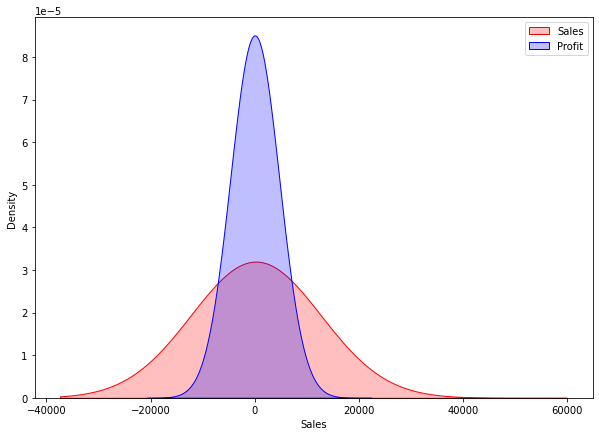

In [43]:
#KDE Plot
plt.figure(figsize=(10,7))
sns.kdeplot(dataset['Sales'], color='red', label='Sales', shade=True, bw_method=20)
sns.kdeplot(dataset['Profit'], color='blue', label='Profit', shade=True, bw_method=20)
plt.legend()
plt.show()

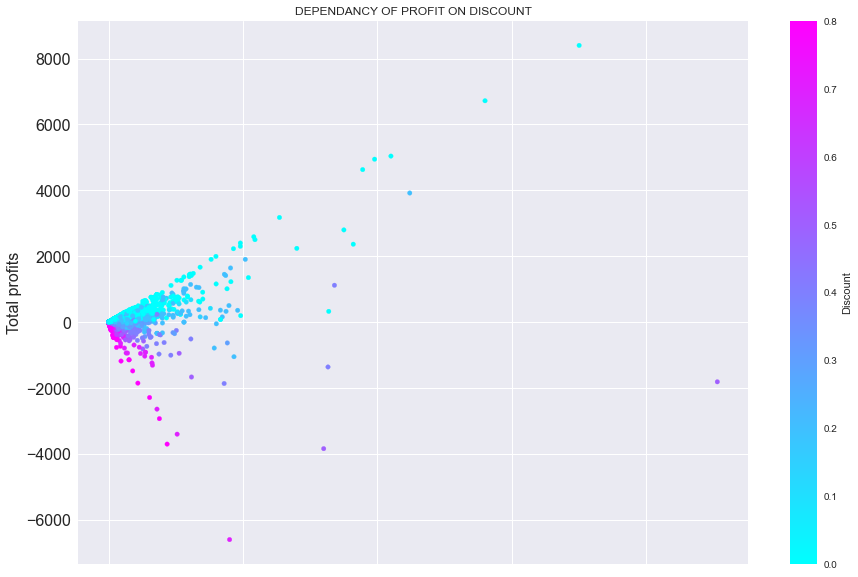

In [44]:
#DEPENDANCY OF PROFIT ON DISCOUNT
plt.style.use('seaborn')
dataset.plot(kind='scatter', figsize= (15,10), x='Sales', y='Profit', c='Discount', s= 20, fontsize= 16, colormap= 'cool')
plt.ylabel('Total profits', fontsize= 16)
plt.title('DEPENDANCY OF PROFIT ON DISCOUNT')
plt.show()

The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

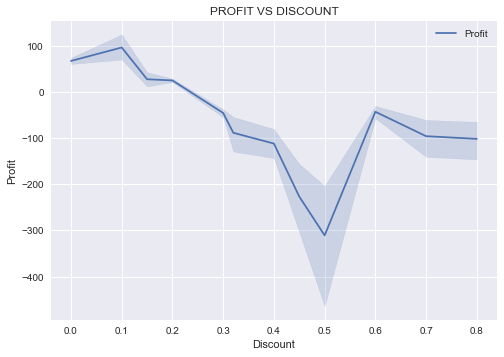

In [45]:
# Profit vs discount
sns.lineplot(x='Discount',y='Profit',label='Profit',data=dataset)
plt.title('PROFIT VS DISCOUNT')
plt.legend()
plt.show()

As Discount increases the profit decreases till 50% discount after that profit shows an increament with discount. Their is some correlation between profit and discount

Upto 0-10% discount and more than 60% discount generates profit
40% discount has very less profit

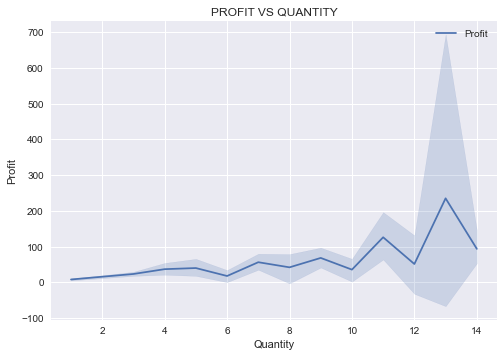

In [47]:
# Quantity Vs Profit profile using lineplot
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=dataset)
plt.title('PROFIT VS QUANTITY')
plt.legend()
plt.show()


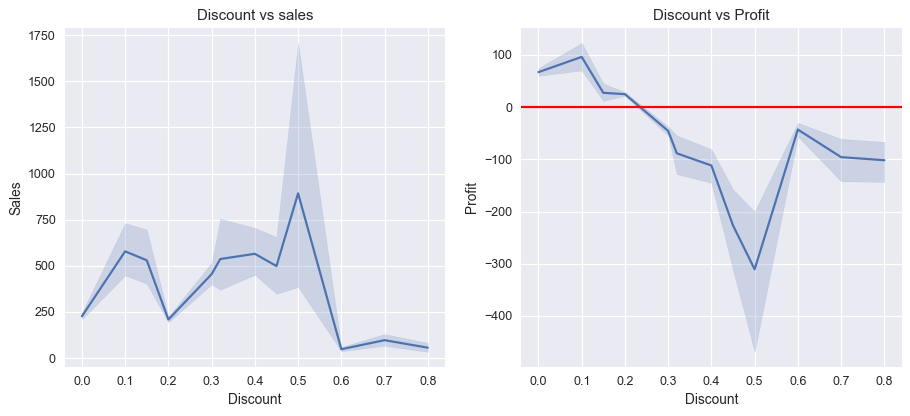

In [48]:
# Let's visualize effect of discount on sales and profit
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=dataset,x='Discount',y='Sales')
plt.title('Discount vs sales')

plt.subplot(1,2,2)
sns.lineplot(data=dataset,x='Discount',y='Profit')
plt.title('Discount vs Profit')
plt.axhline(y=0,color='red');

Analysis from above plots:- Providing discounts on products has brought in loss in most of the cases, so maybe providing discounts should not be considered

### discount and profit analysis in comsumer segments

In [49]:
consumer_prod = dataset[dataset['Segment'] == 'Consumer']

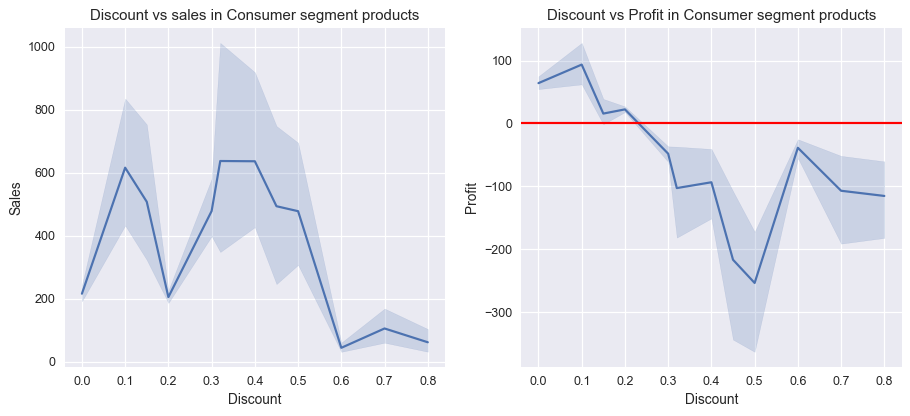

In [50]:
# Let's visualize effect of discount on sales and profit
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=consumer_prod,x='Discount',y='Sales')
plt.title('Discount vs sales in Consumer segment products')

plt.subplot(1,2,2)
sns.lineplot(data=consumer_prod,x='Discount',y='Profit')
plt.title('Discount vs Profit in Consumer segment products')
plt.axhline(y=0,color='red');

We can see that providing more discounts on products has increased the sales of the products but on the other hand it has drastically reduced the profits.

We can see in Discount vs Profit plot- that providing discounts upto 19-20% has seen little profits, but discounts any higher than this has negative profits.

So it can be concluded that only 19-20% discounts should be given on consumer products to see good profits

### discount and profit analysis in corprate segments

In [51]:
corporate_prod = dataset[dataset['Segment'] == 'Corporate']

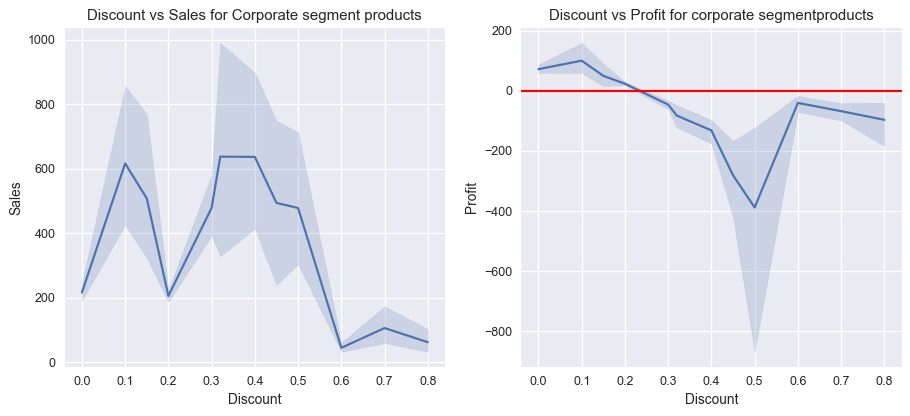

In [52]:
# Let's visualize it
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=consumer_prod,x='Discount',y='Sales')
plt.title('Discount vs Sales for Corporate segment products')

plt.subplot(1,2,2)
sns.lineplot(data=corporate_prod,x='Discount',y='Profit')
plt.title('Discount vs Profit for corporate segmentproducts')
plt.axhline(y=0,color='red');


We can see that upto 15-20% of discount has brought positive profit, but discounts nay higher than that has negative profits, so this should be the max discounts on Corporate products¶

### discount and profit analysis in home office segments

In [53]:
home_office = dataset[dataset['Segment'] == 'Home Office']

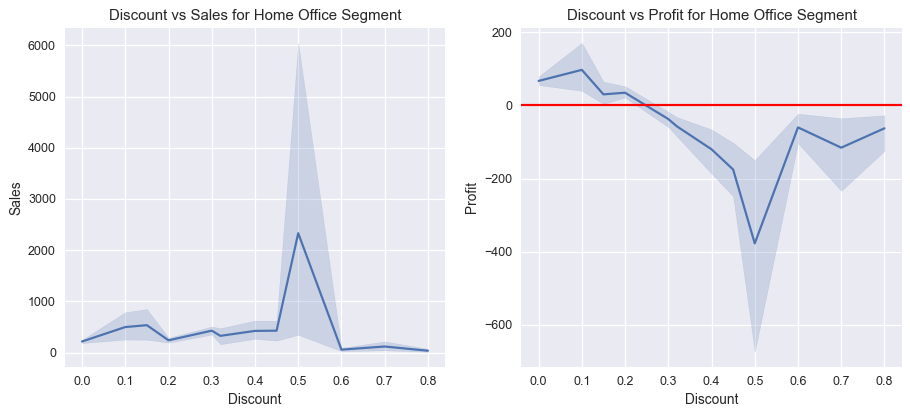

In [54]:
# Let's visualize it
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=home_office,x='Discount',y='Sales')
plt.title('Discount vs Sales for Home Office Segment')

plt.subplot(1,2,2)
sns.lineplot(data=home_office,x='Discount',y='Profit')
plt.title('Discount vs Profit for Home Office Segment')
plt.axhline(y=0,color='red');

We can see that upto 20-25% of discount has brought positive profit, but discounts nay higher than that has negative profits, so this shoud be the max discounts on Home Office segment.

 ## **Summary**

*   Subcategory :  
                   1.  highest profit - Tables
                   2.  least profit - Copiers

                   1.  highest sales - Phones
                   2.  least sales - Fasteners
*   Category :     
                   1.  highest profit - TECHNOLOGY(50.8%)
                   2.  least profit - FURNITURE(6.4%)

                   1.  highest sales - TECHNOLOGY(36.4%)
                   2.  least sales -  OFFICE SUPPLY(31.3%)
*   State :
                   1. highest profit - CALIFORNIA
                   2. least profit - TEXAS

                   1. highest sales - CALIFORNIA
                   2. least sales - NORTH DAKOTA
*   Region :      
                   1. highest profit - WEST (37.8%)
                   2. least profit - CENTRAL (13.9%)

                   1. highest sales - WEST (31.6%)
                   2. least sales -  SOUTH (17.1%)








### As a business manager, try to find out the weak areas where you can work to make more profit.
 Sub-Categories like Supplies, Bookcases, Machines, Tables which have more sales but still in loss.
 
Discount is one more most affecting factor to the profit. We can set a discount in such a way that we will get atleast minimun profit.

Furniture category has 2nd highest sales but profit is very low. This is the main area on which business manager will have to work more.

we have to focus on Central & South region because, here sales & profit both are less. So we have study the needs of that region people and according to allot a high moving items for that regions.

Segmentwise we have to work on Home Office segment & corporate segment.

Wyoming, West Virginia, North Dajota, Maine, District of Columbia are bottom 5 states which have lowest no. of buyers.

### What all business problems you can derive by exploring the data?
Copiers, Machines, suppliers, Fasteners, Bookcases are 5 bottom most low moving sub-categories.

Wyoming, West Virginia, North Dajota, Maine, District of Columbia are bottom 5 states which have lowest no. of buyers.
Imbalance of Profit & Discount.

Home Office segment have less sales & profit

Texas has highest loss as compare to Sales

The Furniture has more sales but profit is very low

Tables and Bookmarks have facing huge loss


# THANK YOU